In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
csv_path = "/content/drive/My Drive/ds_AastikSonkar/csv_files/"
output_path = "/content/drive/My Drive/ds_AastikSonkar/outputs/"

In [5]:
import os
os.makedirs(output_path, exist_ok=True)

In [6]:
fear_greed = pd.read_csv(csv_path + "fear_greed.csv")
trades = pd.read_csv(csv_path + "historical_trader_data.csv")

In [7]:
print("Fear & Greed Data:")
display(fear_greed.head())

print("\nTrader Data:")
display(trades.head())

Fear & Greed Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [8]:
fear_greed["date"] = pd.to_datetime(fear_greed["date"], errors="coerce")
trades["Timestamp IST"] = pd.to_datetime(trades["Timestamp IST"], dayfirst=True, errors="coerce")


In [9]:
trades["trade_date"] = trades["Timestamp IST"].dt.date
fear_greed["date_only"] = fear_greed["date"].dt.date

In [10]:
merged = pd.merge(
    trades,
    fear_greed,
    left_on="trade_date",
    right_on="date_only",
    how="left"
)

print(f"Merged dataset shape: {merged.shape}")
display(merged.head())

Merged dataset shape: (211224, 22)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,trade_date,timestamp,value,classification,date,date_only
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02,2024-12-02


In [11]:
daily_metrics = merged.groupby(["trade_date", "classification"]).agg({
    "Size USD": "sum",                # Total traded volume in USD
    "Closed PnL": ["mean", "sum"],    # Average and total PnL
    "Execution Price": "mean",        # Avg execution price
    "Fee": "sum",                     # Total fees
    "Account": "nunique",              # Unique traders
}).reset_index()


In [12]:
daily_metrics.columns = [
    'trade_date', 'classification',
    'total_volume_usd', 'avg_pnl', 'total_pnl',
    'avg_price', 'total_fee', 'unique_traders'
]

display(daily_metrics.head())

,trade_date,classification,total_volume_usd,avg_pnl,total_pnl,avg_price,total_fee,unique_traders
0,2023-05-01,Greed,477.00,0.000000,0.000000,1898.133333,0.000000,1
1,2023-12-05,Extreme Greed,50005.83,0.000000,0.000000,11038.300000,12.501455,1
2,2023-12-14,Greed,113203.35,-18.675885,-205.434737,8031.868818,28.300831,1
3,2023-12-15,Greed,10609.95,-12.316017,-24.632034,2.982000,2.652489,1
4,2023-12-16,Greed,15348.77,0.000000,0.000000,0.384707,3.837189,1


In [13]:
sentiment_group = daily_metrics.groupby("classification").mean(numeric_only=True)
display(sentiment_group)

,total_volume_usd,avg_pnl,total_pnl,avg_price,total_fee,unique_traders
classification,,,,,,
Extreme Fear,8.177447e+06,38.433903,52793.589178,5697.303079,1706.330996,11.428571
Extreme Greed,1.091800e+06,56.736108,23817.292199,7069.526489,237.111101,4.614035
Fear,5.311261e+06,31.276567,36891.818040,12050.374634,1016.010425,6.923077
Greed,1.495246e+06,39.412175,11140.566181,12301.642333,326.936228,3.357513
Neutral,2.690180e+06,63.820699,19297.323516,18440.275907,587.675646,5.611940


In [14]:
sns.set_style("whitegrid")

/tmp/ipython-input-123564834.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_metrics, x="classification", y="avg_pnl", palette="coolwarm")


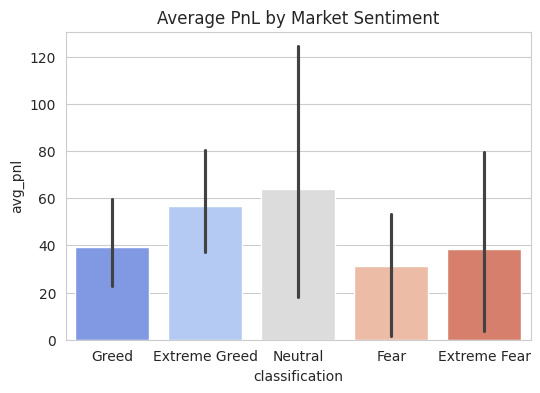

In [15]:
plt.figure(figsize=(6,4))
sns.barplot(data=daily_metrics, x="classification", y="avg_pnl", palette="coolwarm")
plt.title("Average PnL by Market Sentiment")
plt.savefig(output_path + "avg_pnl_by_sentiment.png", dpi=300)
plt.show()


/tmp/ipython-input-1376888759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_metrics, x="classification", y="total_volume_usd", palette="coolwarm")


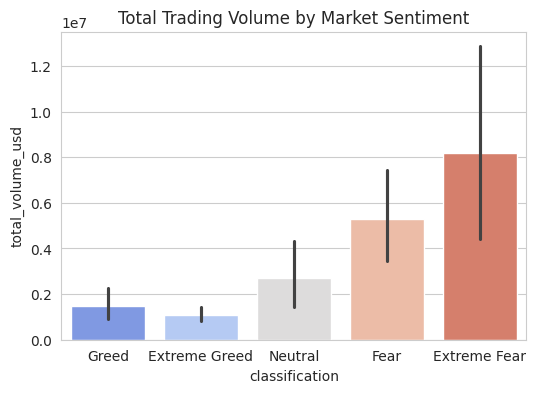

In [16]:
plt.figure(figsize=(6,4))
sns.barplot(data=daily_metrics, x="classification", y="total_volume_usd", palette="coolwarm")
plt.title("Total Trading Volume by Market Sentiment")
plt.savefig(output_path + "total_volume_by_sentiment.png", dpi=300)
plt.show()

/tmp/ipython-input-1669912388.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipython-input-1669912388.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


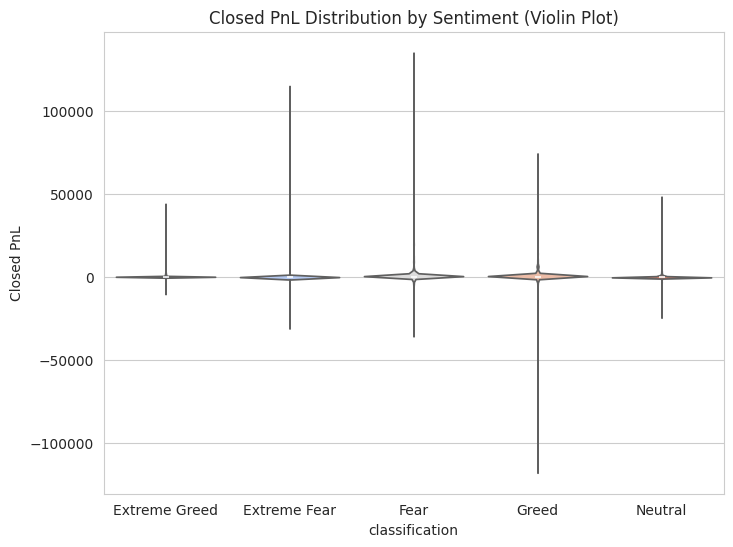

In [17]:

plt.figure(figsize=(8,6))
sns.violinplot(
    data=merged,
    x="classification",
    y="Closed PnL",
    palette="coolwarm",
    cut=0,
    scale="width"
)
plt.title("Closed PnL Distribution by Sentiment (Violin Plot)")
plt.savefig(output_path + "pnl_distribution_violin.png", dpi=300)
plt.show()


In [18]:
from scipy.stats import ttest_ind

In [19]:
fear_pnl = merged[merged["classification"]=="Fear"]["Closed PnL"].dropna()
greed_pnl = merged[merged["classification"]=="Greed"]["Closed PnL"].dropna()

t_stat, p_value = ttest_ind(fear_pnl, greed_pnl, equal_var=False)
print(f"T-test results: t-stat = {t_stat:.2f}, p-value = {p_value:.4f}")

T-test results: t-stat = 1.85, p-value = 0.0642


In [20]:
print("\n--- Key Insights ---")
if p_value < 0.05:
    print("Statistically significant difference in PnL between Fear and Greed days.")
else:
    print("No statistically significant difference in PnL between Fear and Greed days.")

if sentiment_group.loc["Greed", "total_volume_usd"] > sentiment_group.loc["Fear", "total_volume_usd"]:
    print("Traders trade with higher volume during Greed periods.")
else:
    print("Traders trade with higher volume during Fear periods.")

if sentiment_group.loc["Greed", "avg_pnl"] > sentiment_group.loc["Fear", "avg_pnl"]:
    print("Average PnL is higher during Greed periods.")
else:
    print(" Average PnL is higher during Fear periods.")


--- Key Insights ---
No statistically significant difference in PnL between Fear and Greed days.
Traders trade with higher volume during Fear periods.
Average PnL is higher during Greed periods.
